# Question 3

### Importing libraries and dataset

In [109]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

In [110]:
df = pd.read_csv("Social_Network_Ads_tst.csv")

In [111]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Droping useless column

In [112]:
df.drop(['User ID'], axis = 1, inplace = True)

In [113]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [114]:
algorithm = []
accuracy = []
sensitivity = []
f_score = []
precision = []

### Label encoding

In [115]:
label_encoder = preprocessing.LabelEncoder()

In [116]:
print(df['Gender'].unique())
df['Gender']= label_encoder.fit_transform(df['Gender'])
print(df['Gender'].unique())

['Male' 'Female']
[1 0]


### Splitting

In [117]:
X = df.iloc[:,0:3]
Y = df.iloc[:,3]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

### Functions

In [119]:
def scores(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    accu = accuracy_score(y_test, y_pred)
    sens = TP /(TP+FN)
    prec = TP/(TP+FP)
    fs = 2*(prec*sens)/(prec+sens)
    
    accuracy.append(accu)
    sensitivity.append(sens)
    precision.append(prec)
    f_score.append(fs)

### Logistic Regression

In [120]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
algorithm.append("LogisticRegression")
scores(y_test,y_pred)
predicted = model.predict([[1,25,91000]])
print(predicted)

[0]


### KNN

In [121]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
algorithm.append("KNN")
scores(y_test,y_pred)
predicted = model.predict([[1,25,91000]])
print(predicted)

[0]


### Decision Tree

In [122]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
algorithm.append("DecisionTree")
scores(y_test,y_pred)
predicted = model.predict([[1,25,91000]])
print(predicted)

[0]


### Checking performance

In [123]:
score_df = pd.DataFrame(list(zip(algorithm, accuracy, sensitivity, f_score, precision)),columns =['Algorithm', 'Accuracy', 'Sensitivity', 'F-Score', 'Precision'])
score_df.style.hide_index()

Algorithm,Accuracy,Sensitivity,F-Score,Precision
LogisticRegression,0.680000,0.000000,nan,nan
KNN,0.780000,0.656250,0.656250,0.656250
DecisionTree,0.920000,0.906250,0.878788,0.852941


### Bar Plot

<function matplotlib.pyplot.show(close=None, block=None)>

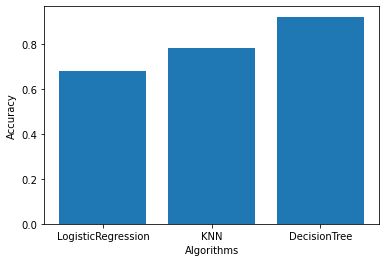

In [124]:
plt.bar(score_df['Algorithm'], score_df["Accuracy"])
plt.xlabel('Algorithms')
plt.ylabel("Accuracy")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

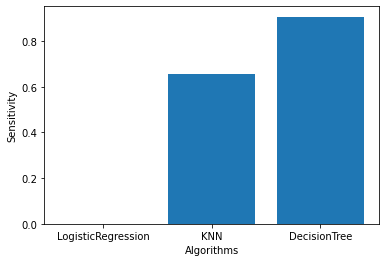

In [125]:
plt.bar(score_df['Algorithm'], score_df["Sensitivity"])
plt.xlabel('Algorithms')
plt.ylabel("Sensitivity")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

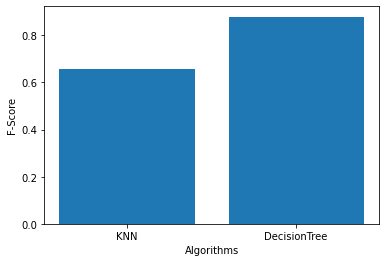

In [126]:
plt.bar(score_df['Algorithm'], score_df["F-Score"])
plt.xlabel('Algorithms')
plt.ylabel("F-Score")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

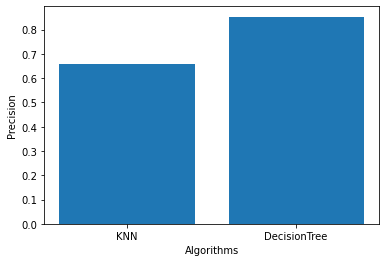

In [127]:
plt.bar(score_df['Algorithm'], score_df["Precision"])
plt.xlabel('Algorithms')
plt.ylabel("Precision")
plt.show

# Question 1

### Creating dataset

In [128]:
s_roll = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
v_num = ["a22","v32","g44","h32","t53","u53","i67","g25","n75","j64","x45","l53","y22","k43","o75","p33","d56","n32","z65","f69"]
v_col = ["red","blue","black","white","silver","red","blue","black","white","silver","red","blue","black","white","silver","red","blue","black","white","silver"]
v_name = ["tata","jaguar","audi","tesla","tata","jaguar","audi","tesla","tata","jaguar","audi","tesla","tata","jaguar","audi","tesla","tata","jaguar","audi","tesla"]
s_name = ["raj","ram","kumar","shalini","priya","rani","sita","lakshman","bajrangi","ravan","arjun","bheem","supriya","srisri","sai","priyanka","kareena","kriti","gauri","rani"]

In [129]:
df = pd.DataFrame(list(zip(s_roll, v_num, v_col, v_name, s_name)),columns =['Student Roll Number', 'Vehicle Number', 'Vehicle Color', 'Vehicle Name', 'Student Name'])

In [130]:
df

,Student Roll Number,Vehicle Number,Vehicle Color,Vehicle Name,Student Name
0,1,a22,red,tata,raj
1,2,v32,blue,jaguar,ram
2,3,g44,black,audi,kumar
3,4,h32,white,tesla,shalini
4,5,t53,silver,tata,priya
5,6,u53,red,jaguar,rani
6,7,i67,blue,audi,sita
7,8,g25,black,tesla,lakshman
8,9,n75,white,tata,bajrangi
9,10,j64,silver,jaguar,ravan


### Catagorizing into color and roll

In [131]:
color_lst = df['Vehicle Color'].unique()
final_lst = []
for i in range(0,5):
    temp_df = df[df['Vehicle Color'] == color_lst[i]]
    final_lst.append(list(temp_df['Student Roll Number']))
final_lst

[[1, 6, 11, 16],
 [2, 7, 12, 17],
 [3, 8, 13, 18],
 [4, 9, 14, 19],
 [5, 10, 15, 20]]

### Printing final output

In [132]:
for i in range(0,5):
    print("Section "+chr(i+65)+" is alloted to students with vehicle color "+color_lst[i]+". Roll Numbers are:")
    for j in range(0,4):
        print(final_lst[i][j])
    print()

Section A is alloted to students with vehicle color red. Roll Numbers are:
1
6
11
16

Section B is alloted to students with vehicle color blue. Roll Numbers are:
2
7
12
17

Section C is alloted to students with vehicle color black. Roll Numbers are:
3
8
13
18

Section D is alloted to students with vehicle color white. Roll Numbers are:
4
9
14
19

Section E is alloted to students with vehicle color silver. Roll Numbers are:
5
10
15
20



### User check their section by roll

In [136]:
roll = int(input())
for i in range(0,5):
    if roll in final_lst[i]:
        print("Your alloted section is",chr(i+65))

3
Your alloted section is C


# Question 2

In [133]:
from datetime import datetime

shop_name=input("Enter shop name: ")
date=datetime.date(datetime.now())
time=datetime.time(datetime.now())
n=int(input('Enter total no. of products: '))

pid=[]
pname=[]
quantity=[]
cost=[]

for _ in range(n):
    pid.append(input('Enter ProductID: '))
    pname.append(input('Enter Product name: '))
    quantity.append(input('Enter Product quantity: '))
    cost.append(input('Enter Product cost: '))

df=pd.DataFrame({'ProductID':pid, 'Product name':pname, 'Quantity': quantity, 'price': cost})

Enter shop name: Raju Kirana
Enter total no. of products: 3
Enter ProductID: 1
Enter Product name: Soap
Enter Product quantity: 2
Enter Product cost: 5
Enter ProductID: 2
Enter Product name: Shampoo
Enter Product quantity: 2
Enter Product cost: 50
Enter ProductID: 3
Enter Product name: Towel
Enter Product quantity: 2
Enter Product cost: 100


In [134]:
df['price']=pd.to_numeric(df['price'])

total_discount=0

if df['price'].sum() > 5000:
    df['Discount applied']=10
    total_discount=5
elif 5000 > df['price'].sum() > 2000:
    df['Discount applied']=5
    total_discount=2.5
else:
    df['Discount applied']=5

df['Discount applied']=pd.to_numeric(df['Discount applied'])

df['Discounted price']=df['price']-(df['price']*df['Discount applied']/100)
total_discounted_price=df['Discounted price'].sum()-(df['Discounted price'].sum()*total_discount/100)

In [135]:
print('Date: {} \t\t Shop Name: {} \t\t Time: {}'.format(date, shop_name, time))
print('Total price: ', df['price'].sum())
print('Total discount applied: ', total_discount)
print('After discount price: ', total_discounted_price)
df

Date: 2022-04-11 		 Shop Name: Raju Kirana 		 Time: 13:26:54.174710
Total price:  155
Total discount applied:  0
After discount price:  147.25


,ProductID,Product name,Quantity,price,Discount applied,Discounted price
0,1,Soap,2,5,5,4.75
1,2,Shampoo,2,50,5,47.50
2,3,Towel,2,100,5,95.00
